# Custom Graph Attention (GAT) Layer

Extend the `torch_geometric.nn.MessagePassing` class to build a custom graph convolution layer that behaves like the Graph Attention Network layer (described below).

## Setup

In [ ]:
import torch
torch.__version__

'1.9.0+cu111'

In [ ]:
%%capture
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu111.html

!pip install -q torch-geometric

## Overview of Graph Attention Layer

Attention mechanisms have become the state-of-the-art in many sequence-based tasks such as machine translation and learning sentence representations. One of the major benefits of attention-based mechanisms is their ability to focus on the most relevant parts of the input to make decisions. In this problem, we will see how attention mechanisms can be used to perform node classification of graph-structured data through the usage of Graph Attention Networks (GATs).

The article on [Graph Attention Network](https://petar-v.com/GAT/) has more information.



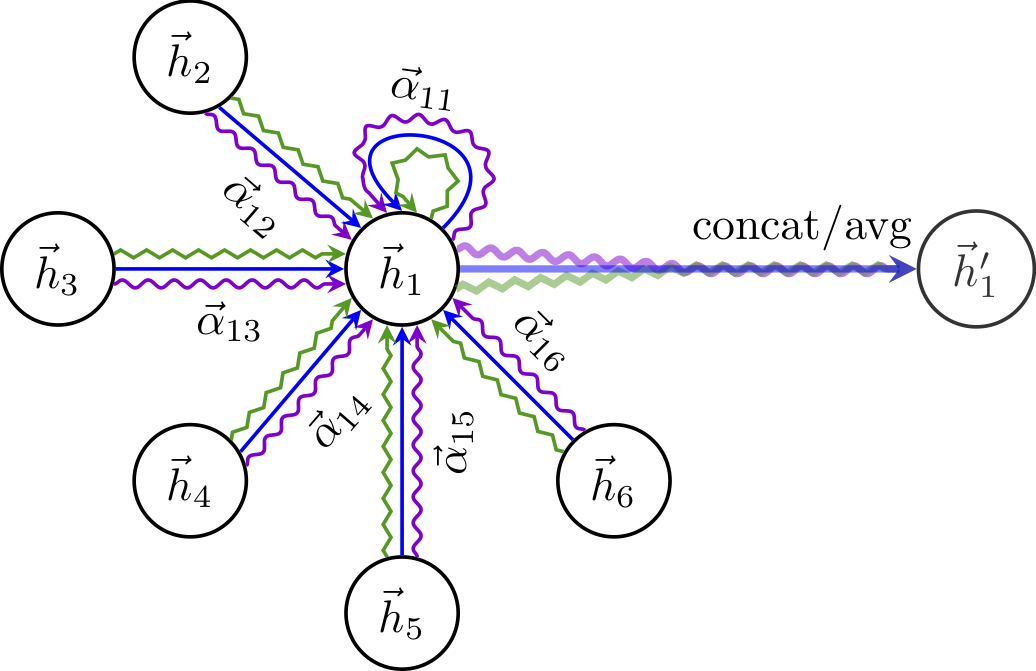

__Source: Graph Attention Networks ([https://arxiv.org/abs/1710.10903](https://arxiv.org/abs/1710.10903))__

Consider a graph _G = (V, E)_. Each node is specified by a feature vector __h__. A graph convolution layer computes for each node feature a new feature vector __h'__. The feature vector $h_i'$ for node i is given by:

$$ \overrightarrow h_i' = \sigma \left ( \sum_{j \in N(i)} \alpha_{ij} \textbf{W} \overrightarrow h_i \right ) $$

where $N(i)$ is the first-order neighborhood of node i (including node i), $\sigma$ is an activation function, and $\alpha_{ij}$ specfies the weighting factor of node j's features to node i.

In GAT, the $\alpha_{ij}$ is computed as the by-product of an attention mechanism, $a: \mathbb{R^N} x \mathbb{R^N} \rightarrow \mathbb{R}$, which computes un-normalized coefficients $e_{ij}$ across pairs of nodes i, j based on their features.

$$ e_{ij} = attention(\overrightarrow{h_i}, \overrightarrow{h_j}) $$

The graph structure is injected into this calculation by only allowing node $i$ to attend over nodes in its neighborhood $j \in N(i)$. These coefficients are then normalized using softmax function.

$$ \alpha_{ij} = \frac{exp(e_{ij})}{\sum_{k \in N(i)} exp(e_{ik})} $$

Finally, for regularization, we use multi-head attention, i.e. the operations are independently replicated K times and outputs are featurewise-aggregated.

$$ \overrightarrow{h_i}' = \Vert_{k=1}^K \sigma \left ( \sum_{j \in N(i)} \alpha_{ij}^k \textbf{W}^k \overrightarrow{h_j} \right ) $$

where $\alpha_{ij}^k$ are the attention coefficients derived by the k-th attention head and $\textbf{W}^k$ is the weight matrix specifying the linear transformation.

In [ ]:
import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

import torch.nn as nn
import torch.nn.functional as F

import torch_scatter

In [ ]:
# your code here

## Test your Custom Layer

Build a small synthetic graph (the `x` and `edge_index`) and send it through your custom layer's `forward()` method, and make sure it returns the correct size of output.

You can generate feature vectors of size `input_dim` each for N nodes and an associated `edge_index` by using the following calls.

```
x = torch.rand((N, input_dim))
edge_index = pyg_utils.random.barabasi_albert_graph(N, N // 5)
```

The instantiate your graph layer with input dimension `input_dim` and an output dimension `output_dim`, and call it on the `x` and `edge_index` you just created. You should expect the shape of the output to be `(N, output_dim)`.


In [ ]:
# your code here